In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def exp_smooth(Y,alpha):
    smooth = [Y[0]]
    for t in range(1, len(Y)):
        smooth.append( (1-alpha)*Y[t] + (alpha)* smooth[t-1])    
    return smooth

def objective(Y,alpha,penalty):
    data = pd.DataFrame({'Y':Y, 'est':exp_smooth(Y,alpha)})
    data['est'] = data['est'].shift(1)
    data = data.dropna()
    
    sum_squares = np.square(data['Y'] - data['est']).sum() + penalty*abs(alpha)
    return sum_squares

def minimal_alpha(Y, penalty, grid_size):
    alphas = np.linspace(0,1,grid_size)
    
    min_alpha = 0.0
    min_obj = np.square( np.diff( np.array(Y)) ).sum()
    
    for alpha in alphas:
        sum_squares = 0.0
        forecast = Y[0]
        
        for t in range(1, len(Y)):
            sum_squares = sum_squares + np.square(Y[t]-forecast)
            forecast = (1-alpha)*Y[t] + alpha*forecast
        
        obj = sum_squares + penalty*alpha
        
        if obj < min_obj:
            min_alpha = alpha
            min_obj = obj
            
    return min_alpha

# Values across various Alpha

In [3]:
def sim_statespace(sample_size,alpha):
    errors = np.random.normal(0,1,sample_size)
    Y = [errors[0]]
    level = errors[0]
    
    for time in range(1,sample_size):
        Y.append(level + errors[time])
        level = level + (1-alpha)*errors[time]
        
    return np.array(Y)

def sim_sse_delta(sample_size,alpha,penalty):
    Y = sim_statespace(sample_size, alpha)
    
    train_index = range(0, round(sample_size/2.0) )
    test_index = range(round(sample_size/2.0), sample_size)
    Ytrain = Y[train_index]
    Ytest = Y[test_index]
    
    alpha_ses = minimal_alpha(Ytrain, 0.0, 100)
    alpha_lasso = minimal_alpha(Ytrain,penalty, 100)
    
    sse_list = []

    for alpha in [alpha_ses, alpha_lasso]:
        test_sse = np.sum(np.square((Y[1:]- exp_smooth(Y,alpha)[0:-1])[-round(sample_size/2.0):]))
        sse_list.append(test_sse)
        
    return (sse_list[1]-sse_list[0])/sse_list[0]

In [6]:
sample_size = 20
sim_count = 1000

alpha_list = []
penalty_list = []
dif_list = []

for penalty in np.linspace(0,10.0, 20):
    for sim in range(0,sim_count):
        alpha_list.append(.1)
        penalty_list.append(penalty)
        dif_list.append(sim_sse_delta(20, .1, penalty ))
        
        alpha_list.append(.2)
        penalty_list.append(penalty)
        dif_list.append(sim_sse_delta(20, .2, penalty ))
        
        alpha_list.append(.3)
        penalty_list.append(penalty)
        dif_list.append(sim_sse_delta(20, .3, penalty ))
        
        alpha_list.append(.4)
        penalty_list.append(penalty)
        dif_list.append(sim_sse_delta(20, .4, penalty ))
        
outcome_df = pd.DataFrame({'alpha':alpha_list,'penalty':penalty_list,'dif':dif_list})

Text(0.5, 1.0, 'Normalized difference in SSE against lambda value for various alpha when T=20')

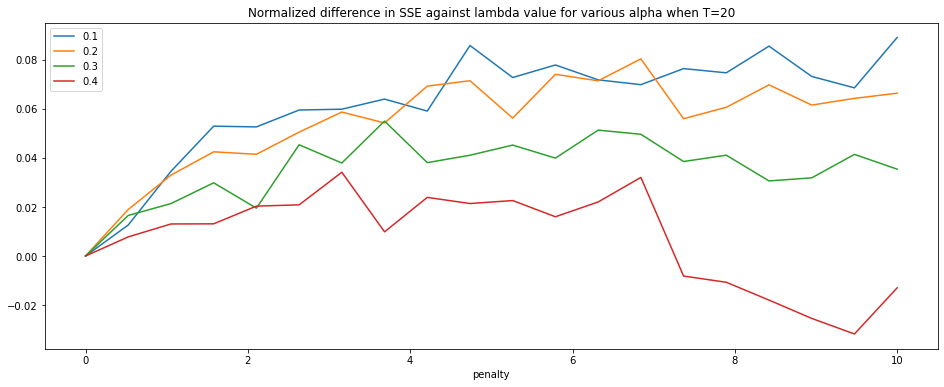

In [9]:
fig, ax = plt.subplots(figsize = (16,6))
for aval  in outcome_df['alpha'].unique():
    outcome_df.query('alpha == @aval')[['penalty','dif']].groupby('penalty').mean().multiply(-1).plot(ax = ax)
    
ax.legend(outcome_df['alpha'].unique())
ax.set_title('Normalized difference in SSE against lambda value for various alpha when T=20')

In [14]:
sample_size = 50
sim_count = 1000

alpha_list = []
penalty_list = []
dif_list = []

for penalty in np.linspace(0,10.0, 20):
    for sim in range(0,sim_count):
        alpha_list.append(.1)
        penalty_list.append(penalty)
        dif_list.append(sim_sse_delta(sample_size, .1, penalty ))
        
        alpha_list.append(.2)
        penalty_list.append(penalty)
        dif_list.append(sim_sse_delta(sample_size, .2, penalty ))
        
        alpha_list.append(.3)
        penalty_list.append(penalty)
        dif_list.append(sim_sse_delta(sample_size, .3, penalty ))
        
        alpha_list.append(.4)
        penalty_list.append(penalty)
        dif_list.append(sim_sse_delta(sample_size, .4, penalty ))
        
big_outcome_df = pd.DataFrame({'alpha':alpha_list,'penalty':penalty_list,'dif':dif_list})

Text(0.5, 1.0, 'Normalized difference in SSE when T=50')

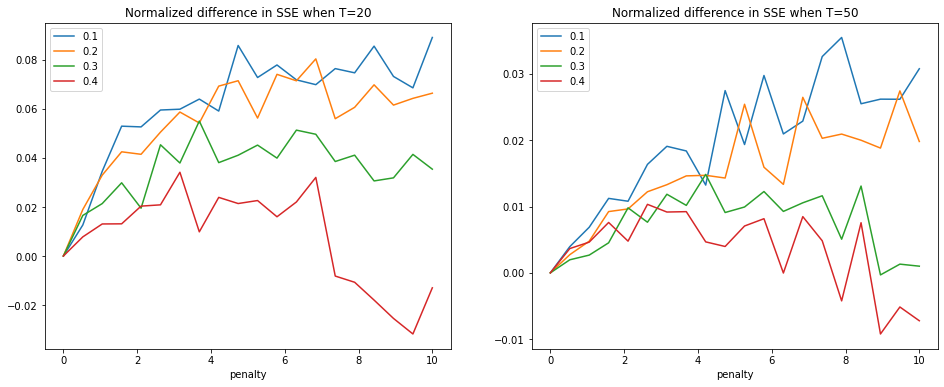

In [15]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize = (16,6))
for aval  in outcome_df['alpha'].unique():
    outcome_df.query('alpha == @aval')[['penalty','dif']].groupby('penalty').mean().multiply(-1).plot(ax = ax1)
    
ax1.legend(outcome_df['alpha'].unique())
ax1.set_title('Normalized difference in SSE when T=20')

for aval  in big_outcome_df['alpha'].unique():
    big_outcome_df.query('alpha == @aval')[['penalty','dif']].groupby('penalty').mean().multiply(-1).plot(ax = ax2)
    
ax2.legend(big_outcome_df['alpha'].unique())
ax2.set_title('Normalized difference in SSE when T=50')

In [17]:
def ar_sim_statespace(sample_size,alpha):
    errors = np.random.normal(0,1,sample_size)
    Y = [errors[0]]
    
    for time in range(1,sample_size):
        Y.append( 1 + alpha*Y[-1] + errors[time])
        
    return np.array(Y)

def ar_sim_sse_delta(sample_size,alpha,penalty):
    Y = ar_sim_statespace(sample_size, alpha)
    
    train_index = range(0, round(sample_size/2.0) )
    test_index = range(round(sample_size/2.0), sample_size)
    Ytrain = Y[train_index]
    Ytest = Y[test_index]
    
    alpha_ses = minimal_alpha(Ytrain, 0.0, 100)
    alpha_lasso = minimal_alpha(Ytrain,penalty, 100)
    
    sse_list = []

    for alpha in [alpha_ses, alpha_lasso]:
        test_sse = np.sum(np.square((Y[1:]- exp_smooth(Y,alpha)[0:-1])[-round(sample_size/2.0):]))
        sse_list.append(test_sse)
        
    return (sse_list[1]-sse_list[0])/sse_list[0]

In [22]:
sample_size = 20
sim_count = 500

alpha_list = []
penalty_list = []
dif_list = []

for penalty in np.linspace(0,10.0, 20):
    for sim in range(0,sim_count):
        
        alpha_list.append(.65)
        penalty_list.append(penalty)
        dif_list.append(ar_sim_sse_delta(sample_size, .65, penalty ))
        
        alpha_list.append(.75)
        penalty_list.append(penalty)
        dif_list.append(ar_sim_sse_delta(sample_size, .75, penalty ))
        
        alpha_list.append(.85)
        penalty_list.append(penalty)
        dif_list.append(ar_sim_sse_delta(sample_size, .85, penalty ))
        
        alpha_list.append(.95)
        penalty_list.append(penalty)
        dif_list.append(ar_sim_sse_delta(sample_size, .95, penalty ))
        
ar_outcome_df = pd.DataFrame({'alpha':alpha_list,'penalty':penalty_list,'dif':dif_list})

Text(0.5, 1.0, 'Normalized difference in SSE when true DGP is AR(1) and T=20')

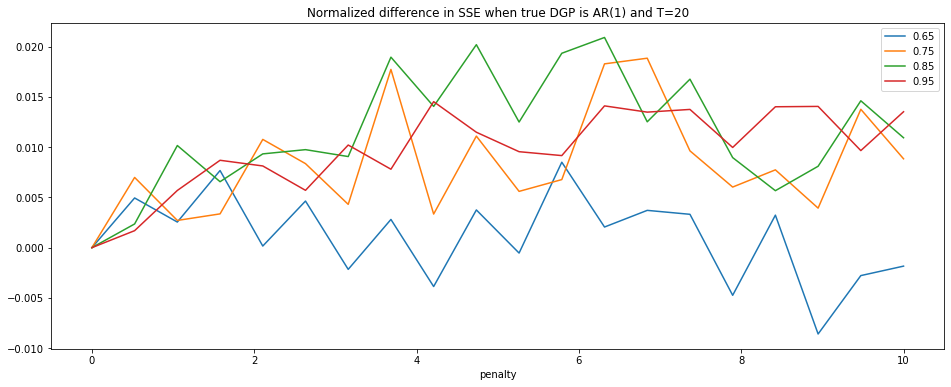

In [24]:
fig, ax = plt.subplots(figsize = (16,6))
for aval  in ar_outcome_df['alpha'].unique():
    ar_outcome_df.query('alpha == @aval')[['penalty','dif']].groupby('penalty').mean().multiply(-1).plot(ax = ax)
    
ax.legend(ar_outcome_df['alpha'].unique())
ax.set_title('Normalized difference in SSE when true DGP is AR(1) and T=20')